In [1]:
# Estos dos comandos evitan que haya que hacer reload cada vez que se modifica un paquete
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

Anotaciones:
Desde el lado de Estadistica querriamos ver que tan bueno se aproxima a una gaussiana. Desde ML que tan bien generaliza

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from collections import Counter
from mpl_toolkits.mplot3d import Axes3D

In [16]:
data = pd.read_csv('data/alturas-pesos-mils-train.csv')[:100]

In [17]:
test = pd.read_csv('data/alturas-pesos-mils-test.csv')

In [52]:
from BiVariateJoint import BiVariateJoint

In [19]:
#data_rounded = (np.round(data/1)*1)
#data_rounded

In [24]:
data_hombres = data.loc[data['Genero']=='Hombre'][['Peso','Altura']].values
data_mujeres = data.loc[data['Genero']=='Mujer'][['Peso','Altura']].values


# Grafico los datos

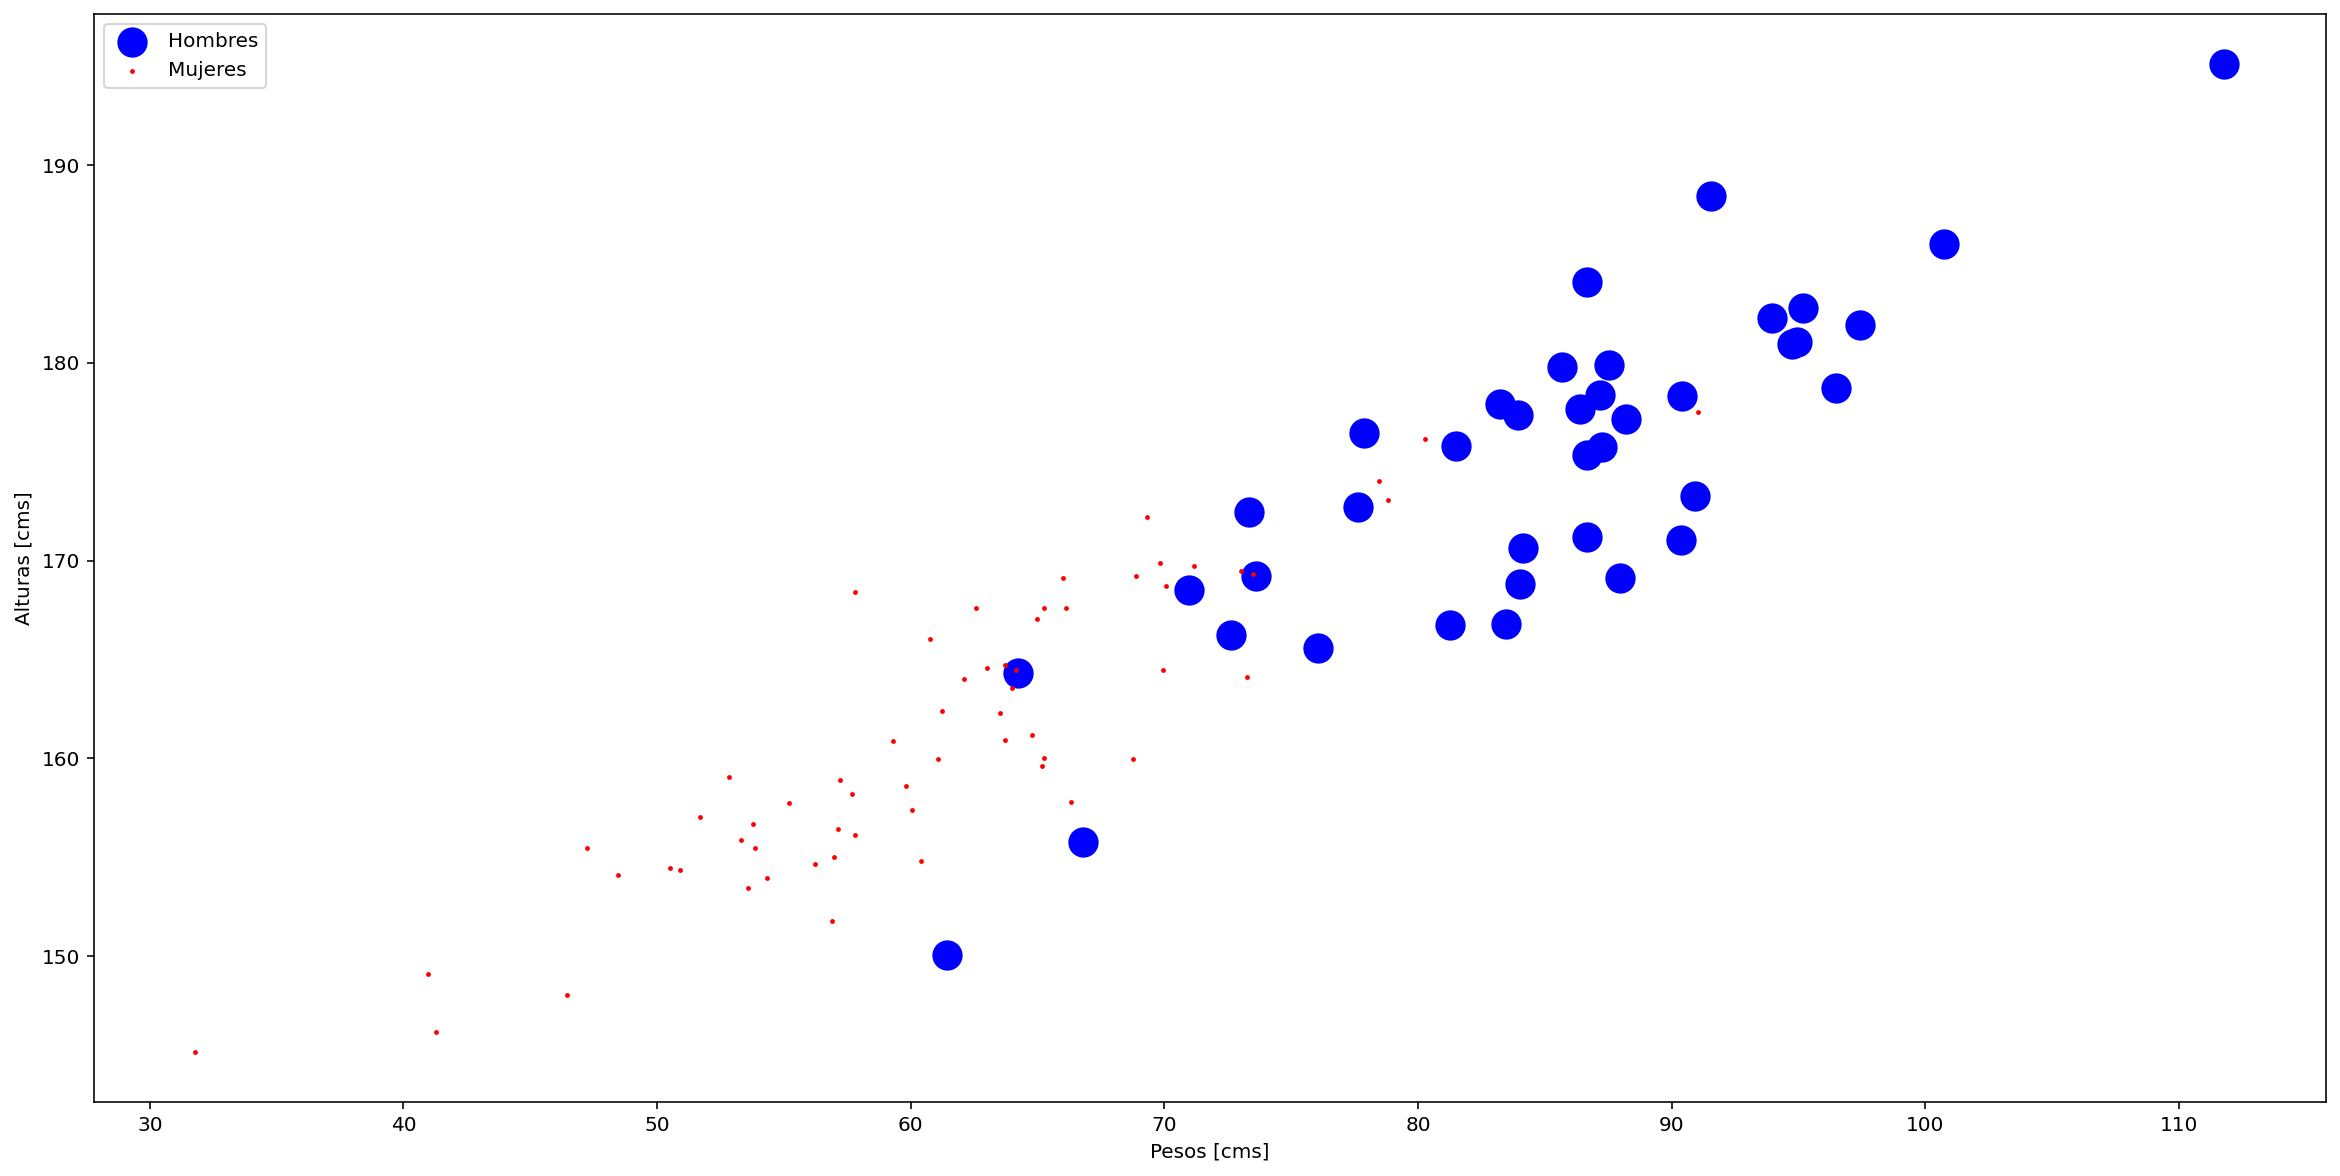

In [39]:
%matplotlib inline
f = plt.figure(figsize=(20,10))
plt.scatter(data_hombres[:,0], data_hombres[:,1], color='b', s=200, label='Hombres')
plt.scatter(data_mujeres[:,0], data_mujeres[:,1], color='r', s=2, label='Mujeres')
plt.xlabel('Pesos [cms]')
plt.ylabel('Alturas [cms]')
plt.legend()
plt.show()

# Regla de Bayes (Discreto)
\begin{equation}
C_0  \rightarrow Hombre \\
C_1 \rightarrow Mujer \\
X_1 \rightarrow Peso \\
X_2 \rightarrow Altura \\
\end{equation}

\begin{equation}
P(C_0 | X_1, X_2) = \frac{P(X_1,X_2 | C_0) P(C_0)}{P(X_1,X_2)} \\
\end{equation}

\begin{equation}
P(C_1 | X_1, X_2) = \frac{P(X_1,X_2 | C_1) P(C_1)}{P(X_1,X_2)}
\end{equation}

\begin{equation}
P(C_0 | X_1, X_2)  \rightarrow p \\
P(C_1 | X_1, X_2) \rightarrow (1-p) \\
\end{equation}
### Log-odds
\begin{equation}
\frac{p}{1-p} = \frac{P(X_1,X_2 | C_0) P(C_0)}{
 P(X_1,X_2 | C_1) P(C_1)}
\end{equation}

Que tenemos?
\begin{equation}
P(Hombre) = \frac{N_{H}}{N_H + N_M} \quad
\end{equation}

\begin{equation}
P(Mujer) = \frac{N_{M}}{N_H + N_M} \quad
\end{equation}


\begin{equation}
\large
P(X_1,X_2) = P(X_1,X_2 | Mujer) P(Mujer) + P(X_1,X_2 | Hombre) P(Hombre)
\end{equation}

Con estimar:
\begin{equation}
P(X_1,X_2 | Mujer) \quad y \quad
P(X_1,X_2 | Hombre) 
\end{equation}

## Estimación de $P(X_1,X_2 | Género)$ como histogramas

\begin{equation}
P(X_1 = x_1,X_2 = x_2 | Hombre) = \frac{N_{x_1x_2H}}{N_H}
\end{equation}

\begin{equation}
P(X_1 = x_1,X_2 = x_2 | Mujer) = \frac{N_{x_1x_2M}}{N_M}
\end{equation}

### Resolución del histograma (Cantidad de Bins o Grupos)

In [53]:
from BiVariateJoint import get_class_prob

In [33]:
step = 2
maxs = np.round(data[['Peso','Altura']].values.max(axis = 0))
mins = np.round(data[['Peso','Altura']].values.min(axis = 0))

joint_hombres = BiVariateJoint(data_hombres, 
                               step_X = step, 
                               step_Y = step,
                               mins = mins, 
                               maxs = maxs
                              )
joint_mujeres = BiVariateJoint(data_mujeres, 
                               step_X = step, 
                               step_Y = step,
                               mins = mins, 
                               maxs = maxs)
#joint_hombres.data[:10]

In [37]:
#joint_hombres.data_rounded[:10]
joint_hombres.X

array([ 30.,  32.,  34.,  36.,  38.,  40.,  42.,  44.,  46.,  48.,  50.,
        52.,  54.,  56.,  58.,  60.,  62.,  64.,  66.,  68.,  70.,  72.,
        74.,  76.,  78.,  80.,  82.,  84.,  86.,  88.,  90.,  92.,  94.,
        96.,  98., 100., 102., 104., 106., 108., 110., 112., 114.])

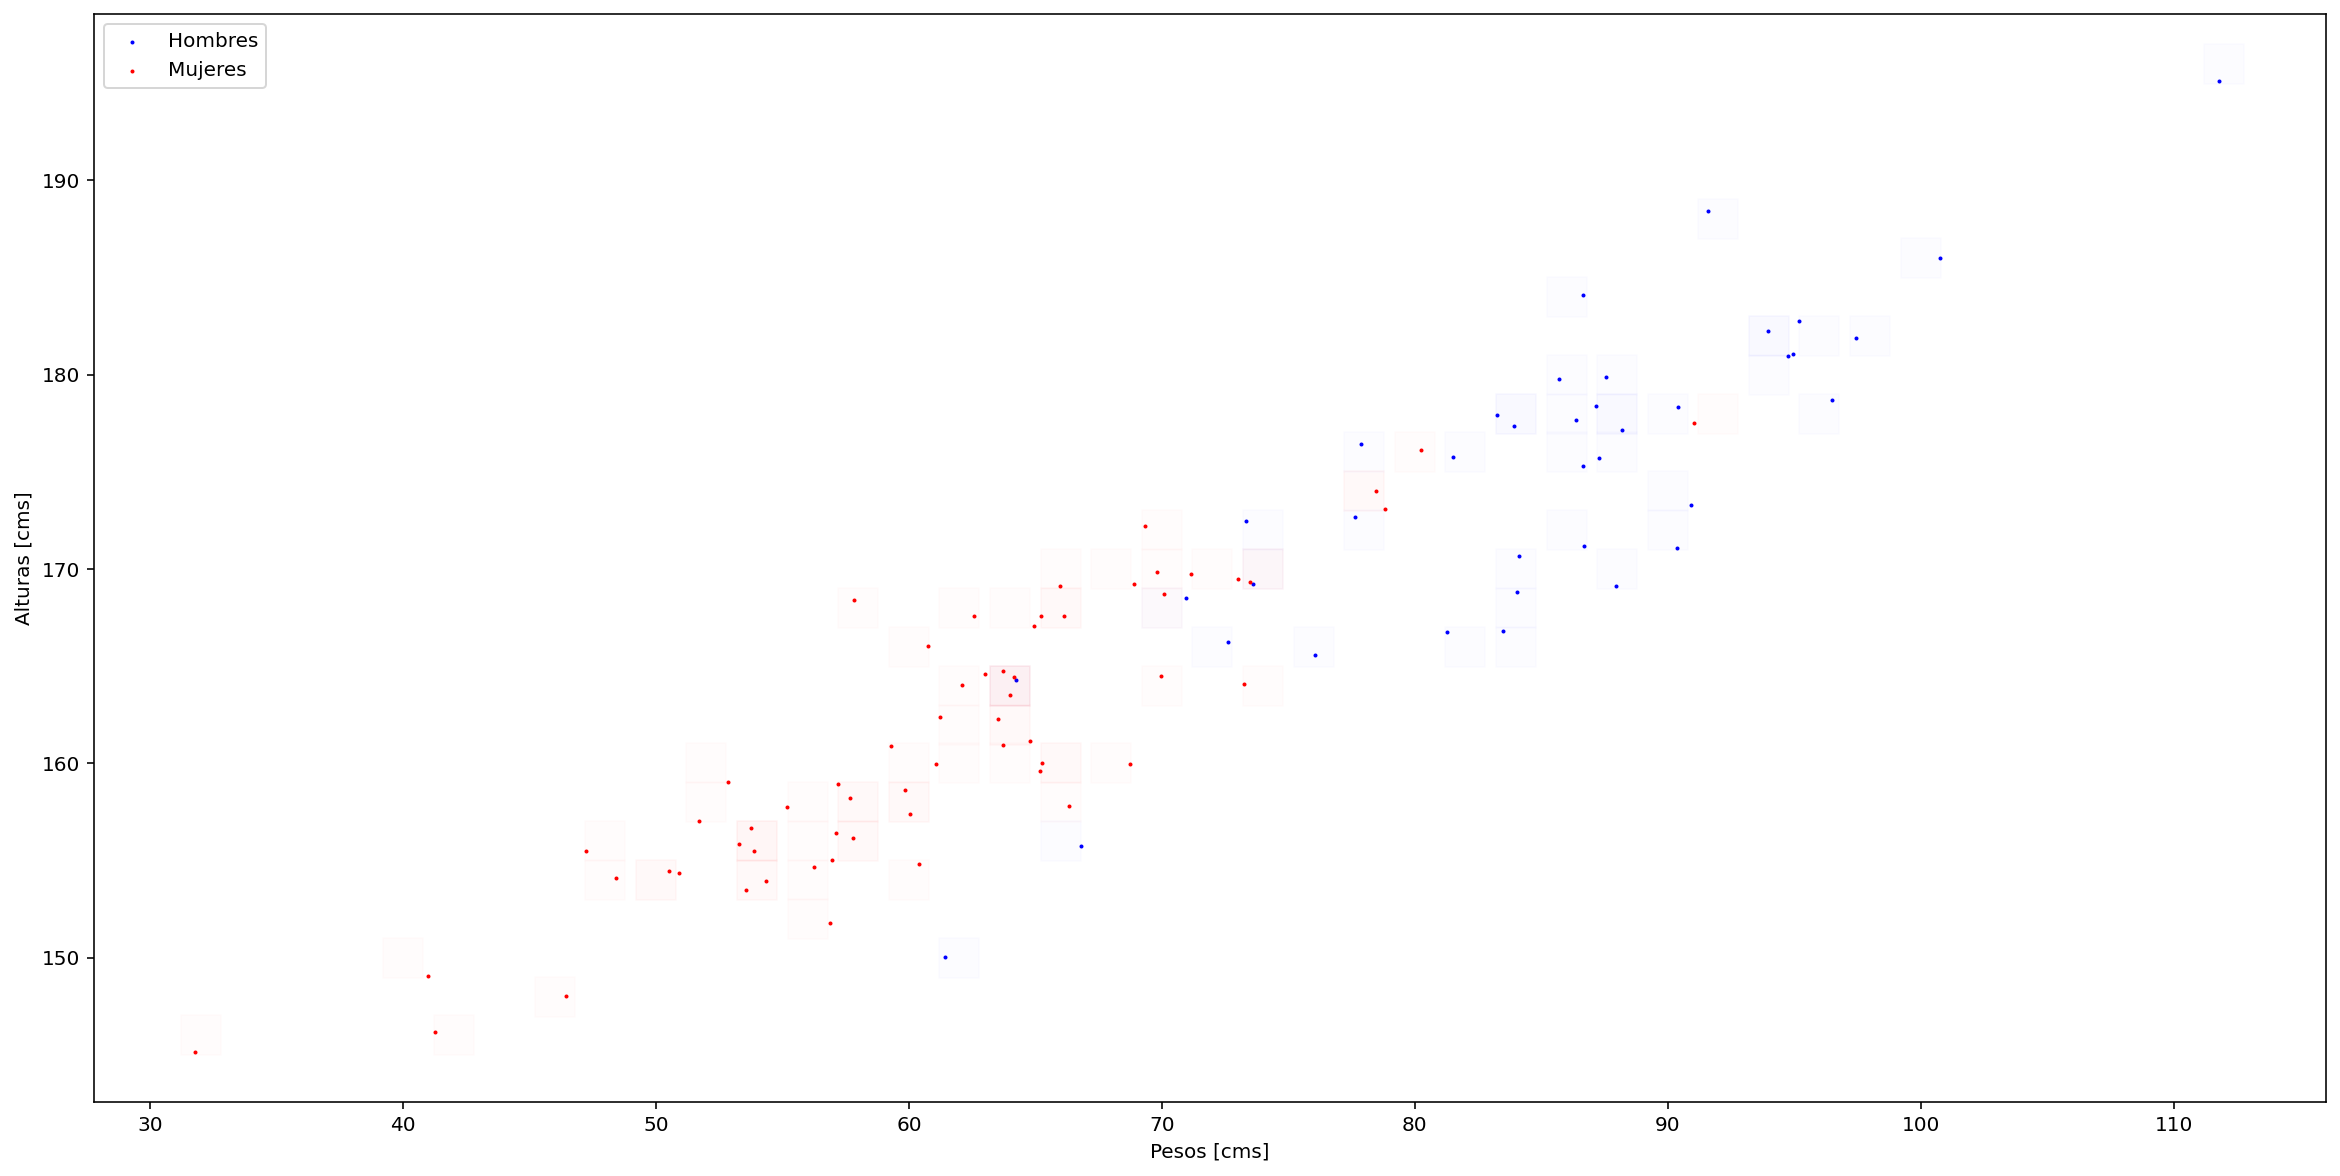

In [43]:
%matplotlib inline
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.scatter(joint_hombres.data_rounded[:,0], joint_hombres.data_rounded[:,1], color='b', s=200 * step, marker='s', alpha=0.01)
ax.scatter(joint_hombres.data[:,0], joint_hombres.data[:,1], color='b', s=1,  alpha=1, label='Hombres')
ax.scatter(joint_mujeres.data_rounded[:,0], joint_mujeres.data_rounded[:,1], color='r', s=200 * step, marker='s', alpha=0.01)
ax.scatter(joint_mujeres.data[:,0], joint_mujeres.data[:,1], color='r', s=1,  alpha=1, label='Mujeres')
plt.xlabel('Pesos [cms]')
plt.ylabel('Alturas [cms]')
plt.legend()
plt.show()

In [49]:
def getAxis():
    fig = plt.figure(figsize=(20,10))
    ax1 = fig.add_subplot(121, projection='3d')
    ax2 = fig.add_subplot(122, projection='3d')
    #ax1.set_aspect('equal')
    #ax2.set_aspect('equal')
    ax1.set_xlabel('Pesos [cms]')
    ax1.set_ylabel('Alturas [cms]')
    ax2.set_xlabel('Pesos [kgs]')
    ax2.set_ylabel('Alturas [cms]')
    ax2.set_zlabel('Frecuencia')
    fig.tight_layout()
    return ax1, ax2

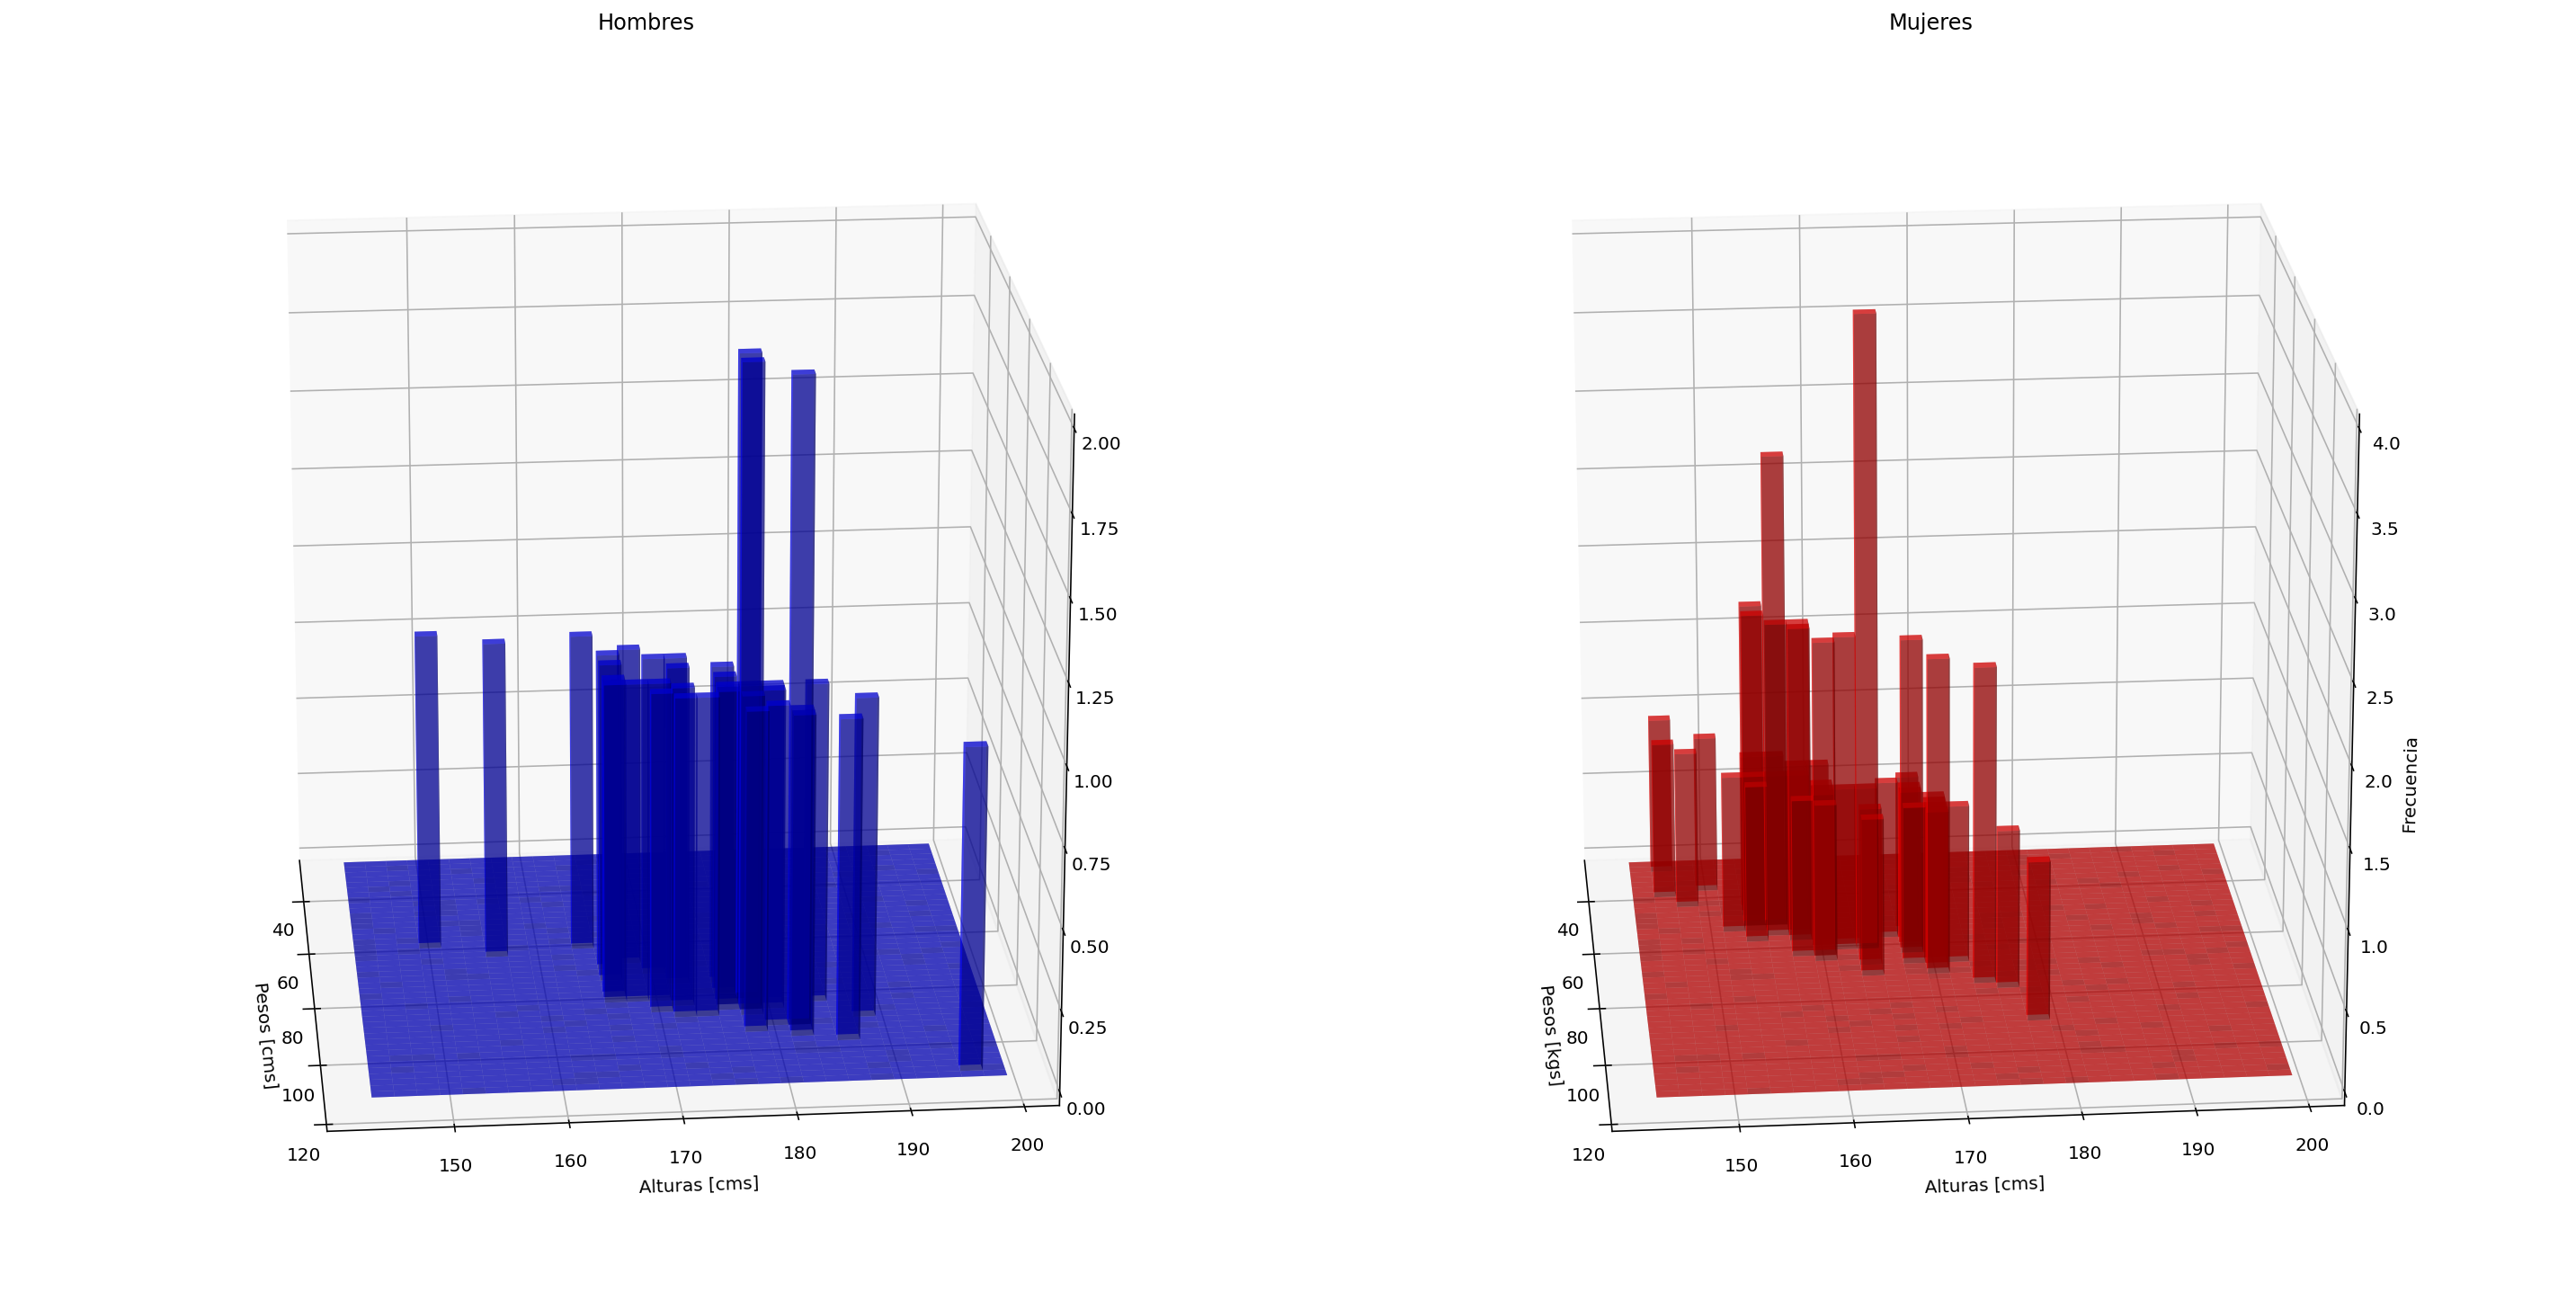

In [50]:
%matplotlib inline
ax1, ax2 = getAxis()
joint_hombres.plot_joint_3d(ax=ax1, color='b', el=20, az=-5, title='Hombres')
joint_mujeres.plot_joint_3d(ax=ax2, color='r', el=20, az=-5, title='Mujeres')

## Calculo a posteriori

\begin{equation}
P(Hombre | X_1, X_2) = \frac{P(X_1,X_2 | Hombre) P(Hombre)}{P(X_1,X_2)} \\
\end{equation}


In [58]:
p_class_1, p_class_2 = get_class_prob(data['Peso'].values, data['Altura'].values, joint_hombres, joint_mujeres)
acc_train_bayes = ((p_class_1>p_class_2) == (data['Genero'].values == 'Hombre')).sum()/len(data)
print(acc_train_bayes)
#p_class_1
#(data['Genero'].values == 'Hombre')

0.83


In [59]:
p_class_1, p_class_2 = get_class_prob(test['Peso'].values, test['Altura'].values, joint_hombres, joint_mujeres)
acc_cv_bayes = ((p_class_1>p_class_2) == (test['Genero'].values == 'Hombre')).sum()/len(test)
print(acc_cv_bayes)

0.6215


# Las clases en el plano

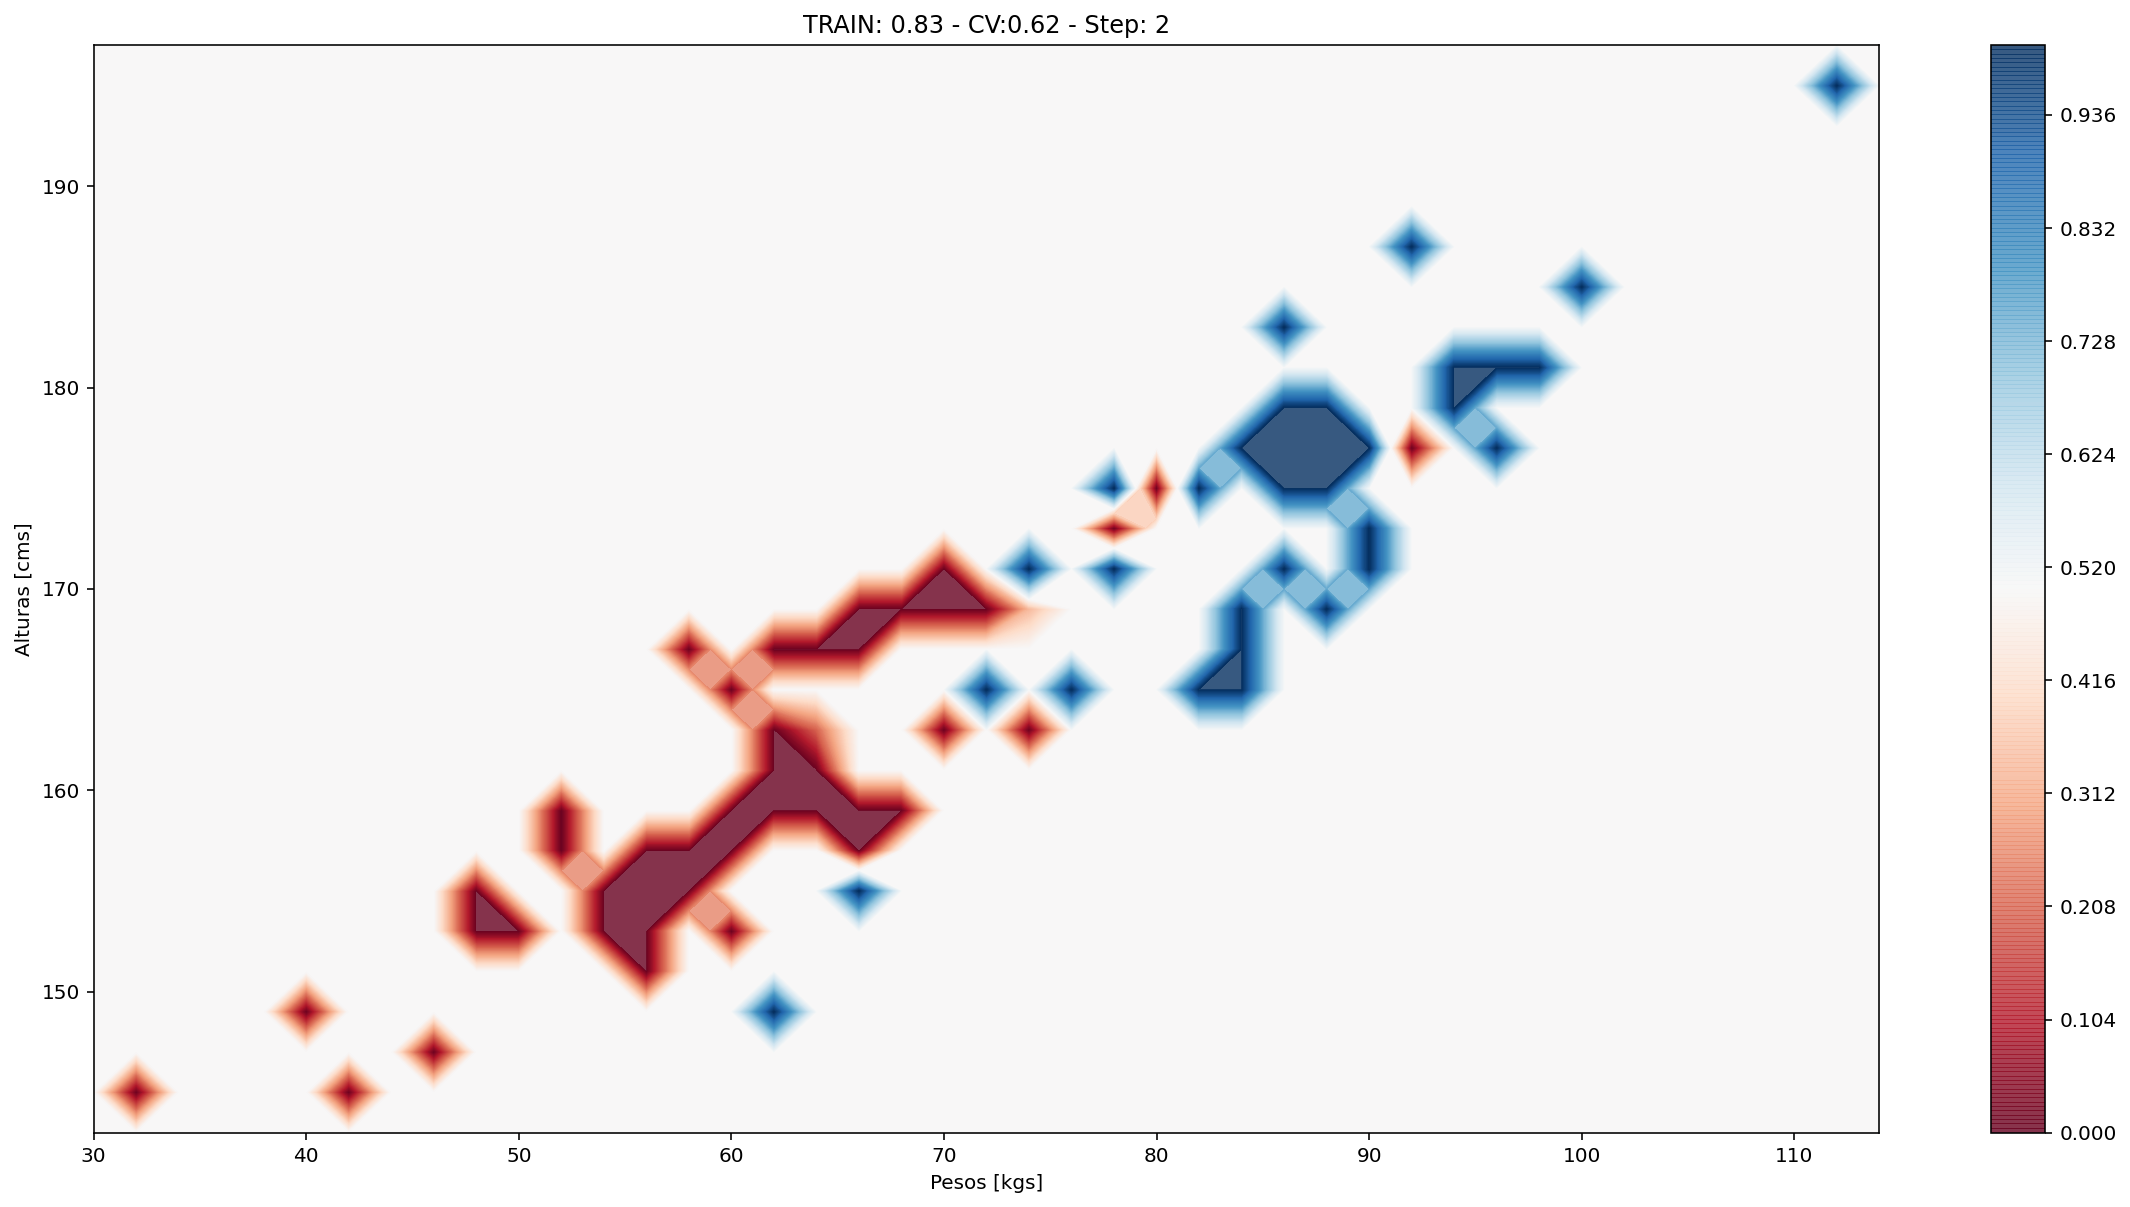

In [60]:
%matplotlib inline
from matplotlib.colors import ListedColormap
X, Y = np.meshgrid(joint_hombres.X, joint_hombres.Y)
Z = np.zeros(X.shape)
for i in range(X.shape[0]):
    Z[i] = get_class_prob(X[i], Y[i], joint_hombres, joint_mujeres)[0]
    
fig = plt.figure(figsize=(20,10))
ax = fig.gca()
cm = plt.cm.RdBu
cf = ax.contourf(X, Y, Z, 256, alpha=.8, vmin=0., vmax=1., cmap=cm)
plt.colorbar(cf, ax=ax)
ax.set_title('TRAIN: ' + str(np.round(acc_train_bayes*100)/100) + ' - CV:' + str(np.round(acc_cv_bayes*100)/100) +' - Step: '+str(step))
ax.set_xlabel('Pesos [kgs]')
ax.set_ylabel('Alturas [cms]')
plt.show()

# Acc en función del step

In [16]:
train_acc = []
test_acc = []
steps = [2, 4,  8, 16, 32]
for step in steps:
    maxs = np.round(data[['Peso','Altura']].values.max(axis = 0))
    mins = np.round(data[['Peso','Altura']].values.min(axis = 0))

    joint_hombres = BiVariateJoint(data_hombres, 
                                   step_X = step, 
                                   step_Y = step,
                                   mins = mins, 
                                   maxs = maxs
                                  )
    joint_mujeres = BiVariateJoint(data_mujeres, 
                                   step_X = step, 
                                   step_Y = step,
                                   mins = mins, 
                                   maxs = maxs)
    p_class_1, p_class_2 = get_class_prob(data['Peso'].values, data['Altura'].values, joint_hombres, joint_mujeres)
    acc_train_bayes = ((p_class_1>p_class_2) == (data['Genero'].values == 'Hombre')).sum()/len(data)
    train_acc.append(acc_train_bayes)
    p_class_1, p_class_2 = get_class_prob(test['Peso'].values, test['Altura'].values, joint_hombres, joint_mujeres)
    acc_cv_bayes = ((p_class_1>p_class_2) == (test['Genero'].values == 'Hombre')).sum()/len(test)
    test_acc.append(acc_cv_bayes)

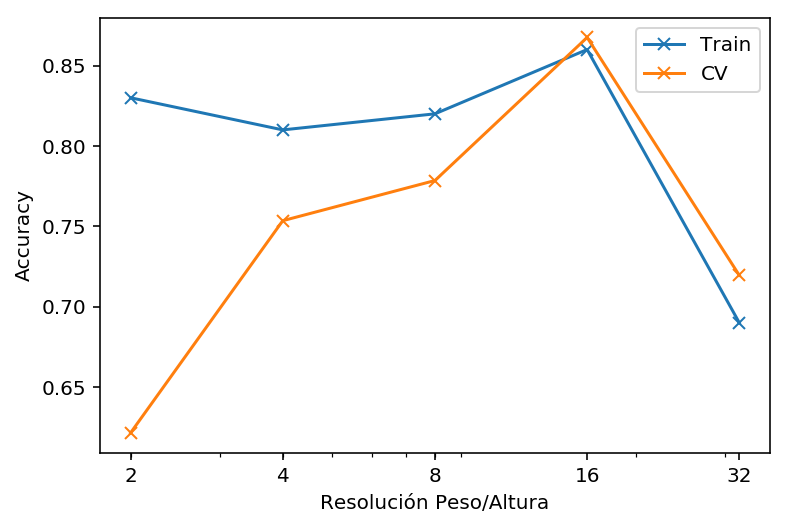

In [18]:
%matplotlib inline
plt.xscale('log')
plt.plot(steps, train_acc, label='Train', marker='x')
plt.plot(steps, test_acc, label='CV', marker='x')
plt.xticks(steps, steps)
plt.xlabel('Resolución Peso/Altura')
plt.ylabel('Accuracy')
plt.legend()
plt.show()